In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
customer = pd.read_csv("011 3.12.Example.csv")
customer

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


In [3]:
customer.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


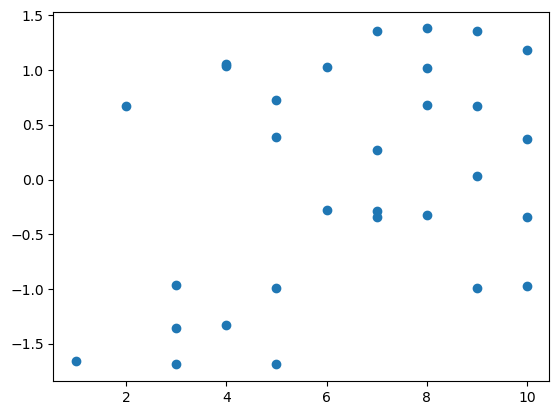

In [5]:
plt.scatter(customer['Satisfaction'],customer['Loyalty'])
plt.show()

In [6]:
x = customer[['Satisfaction','Loyalty']]

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)

In [8]:
kmeans.fit(x)

E:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

In [9]:
kmeans.predict(x)

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0])

In [10]:
customer['Clusters'] = kmeans.predict(x)

In [11]:
customer.head()

,Satisfaction,Loyalty,Clusters
0,4,-1.33,0
1,6,-0.28,0
2,5,-0.99,0
3,7,-0.29,1
4,4,1.06,0


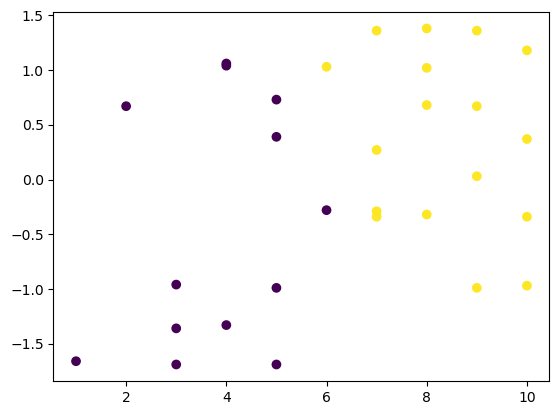

In [13]:
plt.scatter(customer['Satisfaction'],customer['Loyalty'],c=customer['Clusters'])

In [14]:
from sklearn.preprocessing import StandardScaler

standard_scale = StandardScaler()

In [15]:
standard_scale.fit(customer)

StandardScaler()

In [16]:
standard_scale.transform(customer)

array([[-0.93138063, -1.3318111 , -1.14354375],
       [-0.15523011, -0.28117124, -1.14354375],
       [-0.54330537, -0.99160391, -1.14354375],
       [ 0.23284516, -0.29117733,  0.87447463],
       [-0.93138063,  1.05964534, -1.14354375],
       [-2.09560642, -1.6620122 , -1.14354375],
       [ 1.39707095, -0.97159172,  0.87447463],
       [ 0.62092042, -0.32119561,  0.87447463],
       [ 0.62092042,  1.01962097,  0.87447463],
       [ 0.62092042,  0.67941378,  0.87447463],
       [ 1.39707095, -0.3412078 ,  0.87447463],
       [-0.54330537,  0.38923705, -1.14354375],
       [-0.54330537, -1.69203048, -1.14354375],
       [-1.70753116,  0.66940768, -1.14354375],
       [ 0.23284516,  0.26916393,  0.87447463],
       [ 1.00899568,  1.35982816,  0.87447463],
       [ 0.62092042,  1.37984035,  0.87447463],
       [ 0.23284516,  1.35982816,  0.87447463],
       [ 0.23284516, -0.3412078 ,  0.87447463],
       [ 1.00899568,  0.66940768,  0.87447463],
       [ 1.39707095,  1.17971847,  0.874

In [17]:
arr = standard_scale.transform(customer)

In [18]:
customer_stand = pd.DataFrame(arr,columns=customer.columns)

In [19]:
customer_stand.head()

,Satisfaction,Loyalty,Clusters
0,-0.931381,-1.331811,-1.143544
1,-0.155230,-0.281171,-1.143544
2,-0.543305,-0.991604,-1.143544
3,0.232845,-0.291177,0.874475
4,-0.931381,1.059645,-1.143544


In [20]:
kmeans = KMeans(n_clusters=4)

In [21]:
kmeans.fit(customer_stand)

E:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [22]:
kmeans.predict(customer_stand)

array([2, 1, 2, 3, 1, 2, 3, 3, 0, 0, 3, 1, 2, 1, 3, 0, 0, 0, 3, 0, 0, 2,
       1, 2, 0, 3, 3, 3, 2, 1])

In [23]:
customer['Clusters'] = kmeans.predict(customer_stand)

In [24]:
customer.head()

,Satisfaction,Loyalty,Clusters
0,4,-1.33,2
1,6,-0.28,1
2,5,-0.99,2
3,7,-0.29,3
4,4,1.06,1


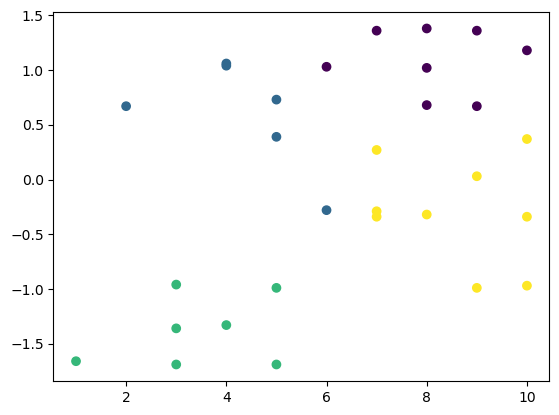

In [25]:
plt.scatter(customer['Satisfaction'],customer['Loyalty'],c=customer['Clusters'])